<a href="https://colab.research.google.com/github/abhishekdhasmana17/ted-talk-view-prediction/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - *Ted Talk Views Prediction*



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Abhishek Dhasmana


# **Project Summary -**

I used stackoverflow (https://stackoverflow.com/), chatGPT (https://chat.openai.com/chat) to solve the problems I have faced throughout the analysis.


# **GitHub Link -**

https://github.com/abhishekdhasmana17/ted-talk-view-prediction

# **Problem Statement**


A TED Talk prediction project would involve using machine learning techniques to predict various aspects of a TED Talk, such as the popularity of a talk or the likelihood that a talk will go viral. The project would likely involve the following steps:

1 - Collecting a dataset of TED Talks.

2 - Performing EDA, Preprocessing the data, including cleaning and structuring the data, and extracting relevant features from the transcripts.

3 - Training a machine learning model on the dataset.

4 - Testing and evaluating the model on a separate dataset to determine its accuracy and effectiveness.

Finally,

Deploying the model to make predictions on new, unseen TED Talks.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries and updating libraries as per needs (will be done numerous times)
%matplotlib inline
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
url = 'https://drive.google.com/file/d/1_H4XvX0tDBJ_kYON2yA23FWKV4_3Tlyd/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

#computing number of rows
rows = len(df.axes[0])

#computing number of columns
cols = len(df.axes[1])

print(rows, cols)   

4005 19


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
pd.DataFrame([[col, df[col].duplicated().sum()]  for  col  in df], columns = ['Column Name', 'Duplicate value Count'])

,Column Name,Duplicate value Count
0,talk_id,0
1,title,0
2,speaker_1,731
3,all_speakers,698
4,occupations,1955
5,about_speakers,1027
6,views,9
7,recorded_date,2670
8,published_date,1043
9,event,3546


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
pd.DataFrame([[col, df[col].isna().sum()]  for  col  in df], columns = ['Column Name','Missing Count'])

,Column Name,Missing Count
0,talk_id,0
1,title,0
2,speaker_1,0
3,all_speakers,4
4,occupations,522
5,about_speakers,503
6,views,0
7,recorded_date,1
8,published_date,0
9,event,0


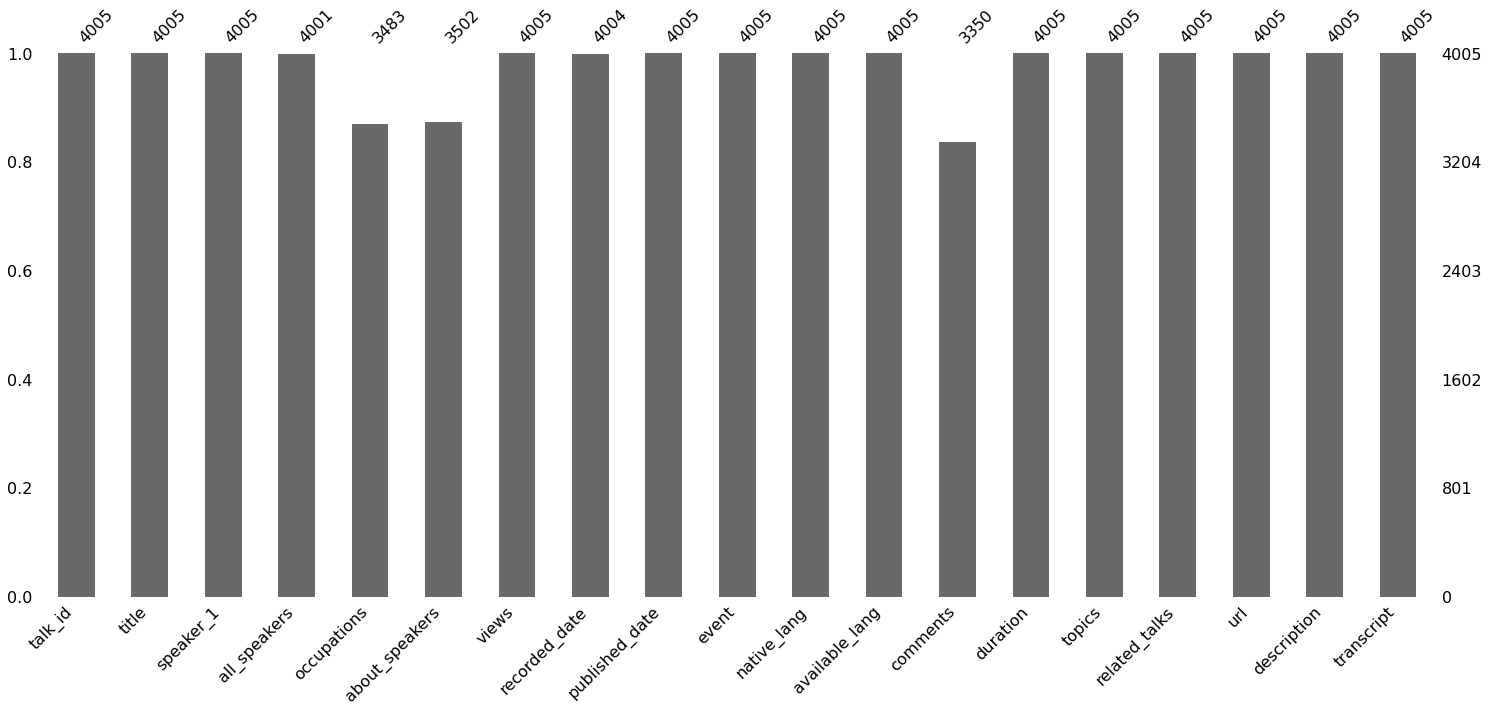

In [8]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

TED (stands for “Technology, Entertainment, and Design”) was founded in 1984 by Richard Salman as a nonprofit organization. The aim is to invite people from TED backgrounds to give a talk or share experience with the world. 

The Data set that i have contains 4000 records along with many details like talk_id, duration, event, etc.

Also, there are ample amount of null values in details(feature) like occupation,comments and about_speaker. 

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Variables Description 

**talk_id**: unique id number provided by TED


**title**: Title of the talk

**speaker_1**: First speaker in TED's speaker list

**all_speakers**: Speakers in the talk

**occupations**: Occupations of the speakers

**about_speaker**: Blurb about each speaker

**recorded_date**: Date the talk was recorded

**published_date**: Date the talk was published to TED.com

**event**: Event or medium in which the talk was given

**native_lang**: Language the talk was given in

**available_lang**: All available languages (lang_code) for a talk

**comments**: Count of comments

**duration**: Duration in seconds

**topics**: Related tags or topics for the talk

**related_talks**: Related talks (key='talk_id',value='title')

**url**: URL of the talk

**description**: Description of the talk

**transcript**: Full transcript of the talk

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
col_unique = df.columns.tolist()
for name in col_unique:
  print(df[name].unique())


[    1    92     7 ... 62263 62784 62794]
['Averting the climate crisis' "The best stats you've ever seen"
 'Simplicity sells' ... 'How "policing for profit" undermines your rights'
 'The electrifying speeches of Sojourner Truth'
 'The most important anus in the ocean']
['Al Gore' 'Hans Rosling' 'David Pogue' ... 'Dick M. Carpenter II'
 'Daina Ramey Berry' 'Cella Wright']
["{0: 'Al Gore'}" "{0: 'Hans Rosling'}" "{0: 'David Pogue'}" ...
 "{0: 'Dick M. Carpenter II'}" "{0: 'Daina Ramey Berry'}"
 "{0: 'Cella Wright'}"]
["{0: ['climate advocate']}"
 "{0: ['global health expert; data visionary']}"
 "{0: ['technology columnist']}" ...
 "{0: ['psychotherapist', 'psychosomatic psychiatrist']}"
 "{0: ['epidemiologist', 'philanthropist'], 1: ['head of ted']}"
 "{0: ['law researcher']}"]
["{0: 'Nobel Laureate Al Gore focused the world’s attention on the global climate crisis. Now he’s showing us how we’re moving towards real solutions.\\r\\n'}"
 "{0: 'In Hans Rosling’s hands, data sings. Global t

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
df.head().T

,0,1,2,3,4
talk_id,1,92,7,53,66
title,Averting the climate crisis,The best stats you've ever seen,Simplicity sells,Greening the ghetto,Do schools kill creativity?
speaker_1,Al Gore,Hans Rosling,David Pogue,Majora Carter,Sir Ken Robinson
all_speakers,{0: 'Al Gore'},{0: 'Hans Rosling'},{0: 'David Pogue'},{0: 'Majora Carter'},{0: 'Sir Ken Robinson'}
occupations,{0: ['climate advocate']},{0: ['global health expert; data visionary']},{0: ['technology columnist']},{0: ['activist for environmental justice']},"{0: ['author', 'educator']}"
about_speakers,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob...",{0: 'David Pogue is the personal technology co...,{0: 'Majora Carter redefined the field of envi...,"{0: ""Creativity expert Sir Ken Robinson challe..."
views,3523392,14501685,1920832,2664069,65051954
recorded_date,2006-02-25,2006-02-22,2006-02-24,2006-02-26,2006-02-25
published_date,2006-06-27,2006-06-27,2006-06-27,2006-06-27,2006-06-27
event,TED2006,TED2006,TED2006,TED2006,TED2006


In [13]:
df.dtypes

talk_id             int64
title              object
speaker_1          object
all_speakers       object
occupations        object
about_speakers     object
views               int64
recorded_date      object
published_date     object
event              object
native_lang        object
available_lang     object
comments          float64
duration            int64
topics             object
related_talks      object
url                object
description        object
transcript         object
dtype: object

In [14]:
#creating dataframe containing english as native language
en_native_lang = df[df['native_lang'] == 'en']
en_native_lang.shape

(3957, 19)

In above code we can see that most of our Ted talks are delivered in English language.

In [15]:
#checking null values 
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [16]:
#replacing null values 
df['occupations'].fillna(str({0:['other']}),inplace=True,axis=0)
df['about_speakers'].fillna(str({0:''}),inplace=True,axis=0)
df['all_speakers'].fillna(str({0:['other']}),inplace=True,axis=0)
df['comments'].fillna((0),inplace=True,axis=0)

In [17]:
#null values are treated
df.isnull().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     1
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

In [18]:
df['occupations']

0                           {0: ['climate advocate']}
1       {0: ['global health expert; data visionary']}
2                       {0: ['technology columnist']}
3         {0: ['activist for environmental justice']}
4                         {0: ['author', 'educator']}
                            ...                      
4000                         {0: ['health activist']}
4001                                   {0: ['other']}
4002                          {0: ['law researcher']}
4003                                   {0: ['other']}
4004                                   {0: ['other']}
Name: occupations, Length: 4005, dtype: object

In [19]:
df.describe(include='object')

,title,speaker_1,all_speakers,occupations,about_speakers,recorded_date,published_date,event,native_lang,available_lang,topics,related_talks,url,description,transcript
count,4005,4005,4005,4005,4005,4004,4005,4005,4005,4005,4005,4005,4005,4005,4005
unique,4005,3274,3307,2050,2978,1334,2962,459,12,3902,3977,4005,4005,4005,4005
top,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['other']},{0: ''},2017-04-24,2017-09-07,TED-Ed,en,['en'],"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,1,34,34,522,503,97,27,556,3957,24,8,1,1,1,1


Formatting features containg date andd time for EDA.

In [20]:
#formatting and adding features as per our requirements
#importing libraries containg date time formatting packages
from datetime import datetime
import calendar
today=datetime.now()
today.strftime('%Y-%m-%d')
import datetime

In [21]:
# Recorded date , Published date :formatting:
df['recorded_date']= pd.to_datetime(df['recorded_date'])
df['published_date']= pd.to_datetime(df['published_date'])
#with above code string type are converted into date type values

In [22]:
# Time period Ted talk has been published
last_publishing_date= df['published_date'].max()
df['time_period_of_talk']= last_publishing_date - pd.DatetimeIndex(df['published_date'])
df['time_period_of_talk']

0      5056 days
1      5056 days
2      5056 days
3      5056 days
4      5056 days
          ...   
4000      3 days
4001      3 days
4002      2 days
4003      0 days
4004      0 days
Name: time_period_of_talk, Length: 4005, dtype: timedelta64[ns]

In [23]:
day_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['published_month'] = pd.DatetimeIndex(df['published_date']).month
df['published_year'] = pd.DatetimeIndex(df['published_date']).year
df['published_day'] = pd.DatetimeIndex(df['published_date']).day

In [24]:
# Average daily views
df['daily_views'] = df['views'] / ( df['time_period_of_talk'].apply(lambda x : x.days) + 1 )

In [25]:
df.head().T

,0,1,2,3,4
talk_id,1,92,7,53,66
title,Averting the climate crisis,The best stats you've ever seen,Simplicity sells,Greening the ghetto,Do schools kill creativity?
speaker_1,Al Gore,Hans Rosling,David Pogue,Majora Carter,Sir Ken Robinson
all_speakers,{0: 'Al Gore'},{0: 'Hans Rosling'},{0: 'David Pogue'},{0: 'Majora Carter'},{0: 'Sir Ken Robinson'}
occupations,{0: ['climate advocate']},{0: ['global health expert; data visionary']},{0: ['technology columnist']},{0: ['activist for environmental justice']},"{0: ['author', 'educator']}"
about_speakers,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob...",{0: 'David Pogue is the personal technology co...,{0: 'Majora Carter redefined the field of envi...,"{0: ""Creativity expert Sir Ken Robinson challe..."
views,3523392,14501685,1920832,2664069,65051954
recorded_date,2006-02-25 00:00:00,2006-02-22 00:00:00,2006-02-24 00:00:00,2006-02-26 00:00:00,2006-02-25 00:00:00
published_date,2006-06-27 00:00:00,2006-06-27 00:00:00,2006-06-27 00:00:00,2006-06-27 00:00:00,2006-06-27 00:00:00
event,TED2006,TED2006,TED2006,TED2006,TED2006


In [26]:
#Updating dataframe with only required features
digital_df   = ['duration', 'talk_id', 'comments']
date_data_df   = ['recorded_date', 'published_date', 'time_period_of_talk', 'published_month', 'published_year', 'published_day', 'daily_views']
class_df = ['event']
target = ['views']
speaker = ['speaker_1']
#textual data which will be used later.
text_df1 = ['title' , 'about_speakers' , 'occupations' , 'transcript' , 'description' ]
off_calc_df  = ['url' , 'all_speakers' , 'native_lang']
text_df2 = ['topics', 'available_lang', 'related_talks']

#full_df is the dataframe conataining every features that was given and added after formatting.
full_df = df[target + text_df1 + text_df2 + off_calc_df + class_df + date_data_df + digital_df + speaker]
full_df.head().T

,0,1,2,3,4
views,3523392,14501685,1920832,2664069,65051954
title,Averting the climate crisis,The best stats you've ever seen,Simplicity sells,Greening the ghetto,Do schools kill creativity?
about_speakers,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob...",{0: 'David Pogue is the personal technology co...,{0: 'Majora Carter redefined the field of envi...,"{0: ""Creativity expert Sir Ken Robinson challe..."
occupations,{0: ['climate advocate']},{0: ['global health expert; data visionary']},{0: ['technology columnist']},{0: ['activist for environmental justice']},"{0: ['author', 'educator']}"
transcript,"Thank you so much, Chris. And it's truly a gre...","About 10 years ago, I took on the task to teac...","(Music: ""The Sound of Silence,"" Simon & Garfun...",If you're here today — and I'm very happy that...,Good morning. How are you? (Audience) Good. It...
description,With the same humor and humanity he exuded in ...,You've never seen data presented like this. Wi...,New York Times columnist David Pogue takes aim...,"In an emotionally charged talk, MacArthur-winn...",Sir Ken Robinson makes an entertaining and pro...
topics,"['alternative energy', 'cars', 'climate change...","['Africa', 'Asia', 'Google', 'demo', 'economic...","['computers', 'entertainment', 'interface desi...","['MacArthur grant', 'activism', 'business', 'c...","['children', 'creativity', 'culture', 'dance',..."
available_lang,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...","['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...","['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...","['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...","['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs..."
related_talks,"{243: 'New thinking on the climate crisis', 54...","{2056: ""Own your body's data"", 2296: 'A visual...","{1725: '10 top time-saving tech tips', 2274: '...",{1041: '3 stories of local eco-entrepreneurshi...,"{865: 'Bring on the learning revolution!', 173..."
url,https://www.ted.com/talks/al_gore_averting_the...,https://www.ted.com/talks/hans_rosling_the_bes...,https://www.ted.com/talks/david_pogue_simplici...,https://www.ted.com/talks/majora_carter_greeni...,https://www.ted.com/talks/sir_ken_robinson_do_...


In [27]:
full_df.shape

(4005, 24)

In [28]:
#this df is mainly focused on numeric values which will be used in EDA 
df_new = df[speaker + digital_df + target  + class_df + date_data_df ]
df_new.head().T    

,0,1,2,3,4
speaker_1,Al Gore,Hans Rosling,David Pogue,Majora Carter,Sir Ken Robinson
duration,977,1190,1286,1116,1164
talk_id,1,92,7,53,66
comments,272.0,628.0,124.0,219.0,4931.0
views,3523392,14501685,1920832,2664069,65051954
event,TED2006,TED2006,TED2006,TED2006,TED2006
recorded_date,2006-02-25 00:00:00,2006-02-22 00:00:00,2006-02-24 00:00:00,2006-02-26 00:00:00,2006-02-25 00:00:00
published_date,2006-06-27 00:00:00,2006-06-27 00:00:00,2006-06-27 00:00:00,2006-06-27 00:00:00,2006-06-27 00:00:00
time_period_of_talk,5056 days 00:00:00,5056 days 00:00:00,5056 days 00:00:00,5056 days 00:00:00,5056 days 00:00:00
published_month,6,6,6,6,6


In [29]:
df_new.shape

(4005, 13)

### What all manipulations have you done and insights you found?

The Dataset itself is self explanatory, that is, all the features are clear to understand.

Treating null values is a crucial task in order to make any analysis.

feature like comments is again an important feature which will be needed to make future predictions. 

Formatting dates in order to draw assumptions about the data set more precisely.

In order to make prediction we required one target variable, target variable with which I will be making predictions is **views**

Checking its relation with other attributes will help us understand what the viewer really wants.

I also updated original ****df**** with ****new_df**** where I only included those features whicl will help me with the Exploratory Data Analysis.

**Note** - *Features that are not included in df_new doesnt mean that they will not be used in analysis, it means they are not relevent for now but will be used in later part of the project.* 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

 #### Chart - 1 | Univariate Analysis on views, duartion, comments, daily views.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

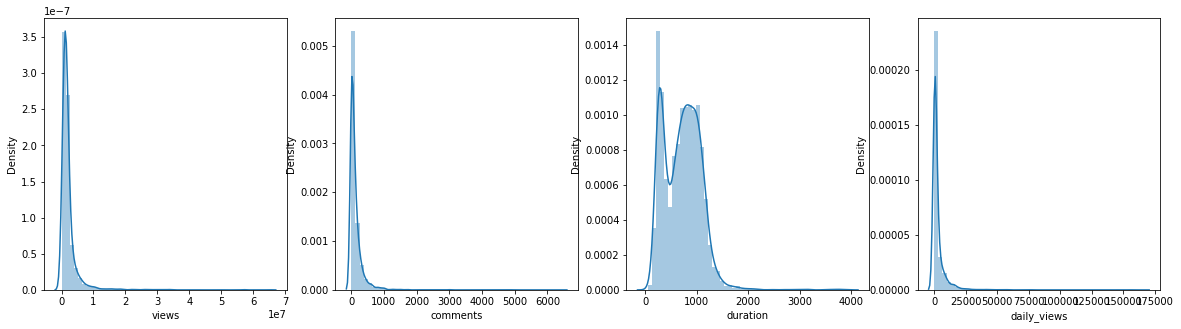

In [30]:
# Chart - 1 visualization code
fig = plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.distplot(df_new['views'])

plt.subplot(1,4,2)
sns.distplot(df_new['comments'])

plt.subplot(1,4,3)
sns.distplot(df_new['duration'])

plt.subplot(1,4,4)
sns.distplot(df_new['daily_views'])



plt.show()

##### 1. Why did you pick the specific chart?

A distplot, also known as a density plot, is used to visualize the distribution of a dataset.
It help us identify the outliers and explains the skewness of the variable.
Since for Machine to learn we need our data free from noise or outliers.

##### 2. What is/are the insight(s) found from the chart?

following are the insights we found -

1. the shape of the distribution

2. the spread of the data

3. whether the data is skewed or has outliers

4. the density of data points in different ranges of values.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Not really because these are the feed back we are getting depending upon the content, but since feed back matters for anyorganisation to improve their content we can consider this as an impact.

### Bivariate Analysis and Multi -Variate analysis

#### Chart - 2 | Top 5 most viewed Speakers

In [31]:
# Chart - 2 visualization code

#top 5 most viewed Speakers.
pop_df=df_new.nlargest(5, ['views'])
pop_df[['speaker_1','views',]]

,speaker_1,views
4,Sir Ken Robinson,65051954
1296,Amy Cuddy,57074270
2062,James Veitch,56932551
646,Simon Sinek,49730580
796,Brené Brown,47544833


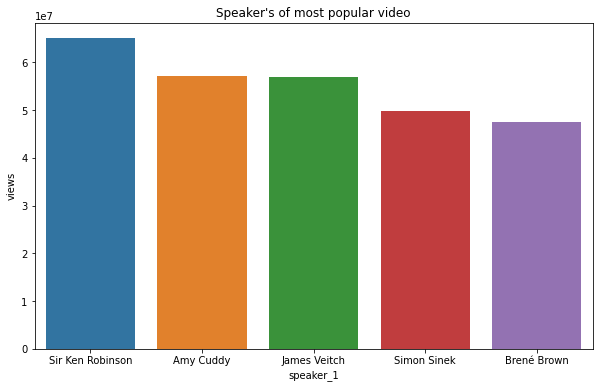

In [32]:
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular video")
sns.barplot(x='speaker_1',y='views',data=pop_df)

##### 1. Why did you pick the specific chart?

It is the widely used plot when it comeas to campare data, here we are compairing top 5 viewed speakers. 

##### 2. What is/are the insight(s) found from the chart?

We found that -

1. **Sir Ken Robinson**	is the most viewed speaker of all time (from the first ted talk till the last date in our dataset)

2. **Amy Cuddy**	and **James Veitch**	share the second and third place with very minimum margin respectively.

3. **Simon Sinek**	and **Brené Brown**	share the fourth and fifth place with very minimum margin respectively.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help us create a positive business impact as we can investigate the content delivered by **Sir Ken Robinson**, after analysing the topics and keywords we can customize the talks for better reach out to viewers.

#### Chart - 3 | Top 5 most viewed titles

In [33]:
# Chart - 3 visualization code

#top 5 most viewed videos
pop_vid5=df.nlargest(5, ['views'])
pop_vid=df.nlargest(4005, ['views'])
pop_vid[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
...,...,...,...
2813,Enric Sala,0,Por qué necesitamos proteger el alta mar
3056,Alejandro Chaskielberg,0,Cómo usar el arte de la fotografía para restau...
3068,Renata di Tullio,0,Por qué deberíamos comer más bichos
3520,James Logan,0,Can dogs sniff out malaria?


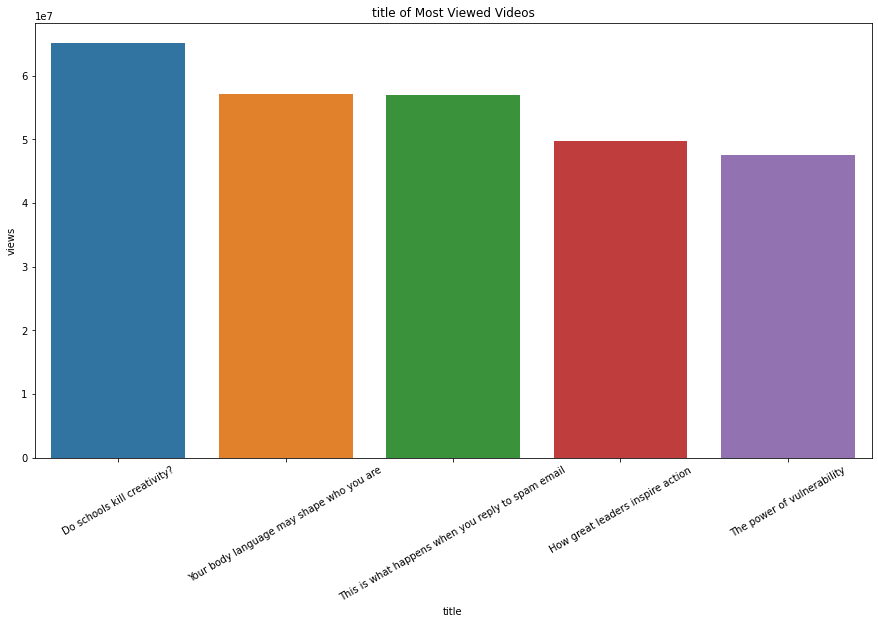

In [34]:
plt.figure(figsize=(15,8))
plt.title("title of Most Viewed Videos")
ax=sns.barplot(x='title', y='views',data=pop_vid5)
plt.setp(ax.get_xticklabels(), rotation=30);

##### 1. Why did you pick the specific chart?

It is the widely used plot when it comeas to campare data, here we are compairing top 5 viewed Videos. 

##### 2. What is/are the insight(s) found from the chart?

we found that -

1. **Do schools kill creativity?** is the most viewed video on the ted talk data set, this talk is delivered by *Sir Ken Robinson* (as stated in chart- 2)

2. We can also see in the pop_vid dtaframe that there are many talks with 0 views. we need to identify the reason which caused this situation because it is nect to impossible.

3. Having zero vies can indicate many things- 

- First we can understand that viewer doesnt get anything usefull from the title. 

- Second, the speaker may be not well known.

- Third, there are missing values in dataset.

- Fourth, the tags aren't reaching the target viewers.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, gained insights help creating a positive business impact.
we can again perform the investigating on most viewed videos to know what viewer are going towards. Also, we can improve the talks which have 0 views. 

#### Chart - 4 | Occupation of top 5 most viewed speakers

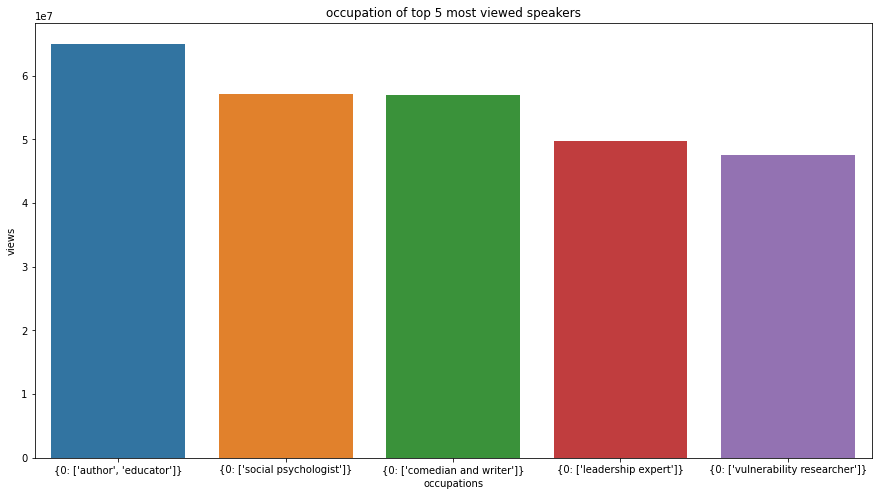

In [35]:
# Chart - 4 visualization code

plt.figure(figsize=(15,8))
plt.title("occupation of top 5 most viewed speakers")
sns.barplot(x='occupations',y='views',data=pop_vid5)

##### 1. Why did you pick the specific chart?

It is the widely used plot when it comeas to campare data, here we are compairing occupation of top 5 viewed speakers. 

##### 2. What is/are the insight(s) found from the chart?

The occupation of most viewed speaker is Author and Educator

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Not sure, occupation is not really matters if the speaker is well known or the title and tag is eye catching.

#### Chart - 5 | Most popular Speaker according to total views on their talks

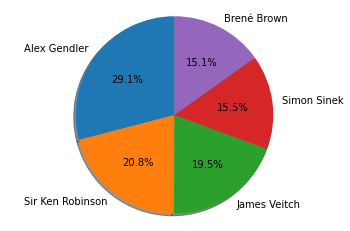

In [36]:

# Chart - 5 visualization code
#creating df of popular speaker
pop_speaker_df=df_new.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(5,['views'])
pop_speaker_df.reset_index(inplace=True)

#making pie chart to show the top 5 speaker based on views
sp = list(pop_speaker_df['speaker_1'])
v = list(pop_speaker_df['views'])
fig, ax = plt.subplots()
ax.pie(v, labels=sp, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

##### 1. Why did you pick the specific chart?

I used pie chart because it is not only easy to understand but it also explains the percentages of how much a value is occupying out of 100.

##### 2. What is/are the insight(s) found from the chart?

we found that top 5 speaker based on total views are - 

1. Alex Gendler	
2. Sir Ken Robinson	
3. James Veitch	
4. Simon Sinek	
5. Brené Brown	



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by knowing that people are watching **Alex Gendler** talks shows that he has a fan base and people are following him.

Viewers are not only following Alex Gendler but other speakers as well, this can help us understand what those apreakers are bringing in the talk because of which viewers are willing to hear more of their talks.

#### Chart - 6 | Most recurring events

In [37]:
# Chart - 6 visualization code

#most recurring events
event_df=df_new[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
event_df.reset_index(inplace=True)
event_df

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


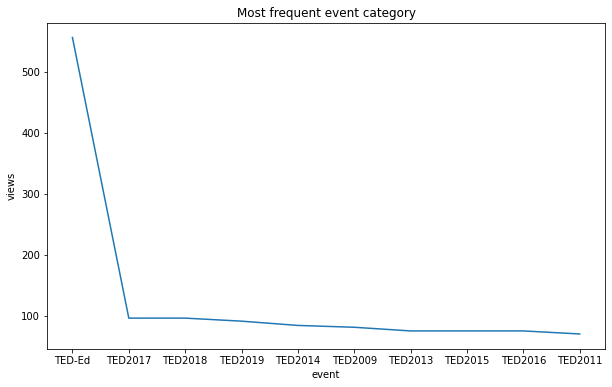

In [38]:
plt.figure(figsize=(10,6))
plt.title('Most frequent event category')
sns.lineplot(x='event',y='views',data=event_df)

##### 1. Why did you pick the specific chart?

for these kind of explaination I usually use bar plot but I was using them quite a lot so that is why i used line plot.

##### 2. What is/are the insight(s) found from the chart?

We can see that TED-Ed is the most reoccuring event of all time, leaving every other event behine with a huge margin.

Also, the events that are happening every year like TED2017, TED2018, etc have sero tendency to re-occur because they happen annually. So, every year they rename the Event with updated year. Hence, same event cant happen twice.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

TED understands that **TED-Ed** is the most valuable event for them so they must gather viewers feed back as much as possible to make it even bigger Event.

#### Chart - 7 | Event Vs. Views

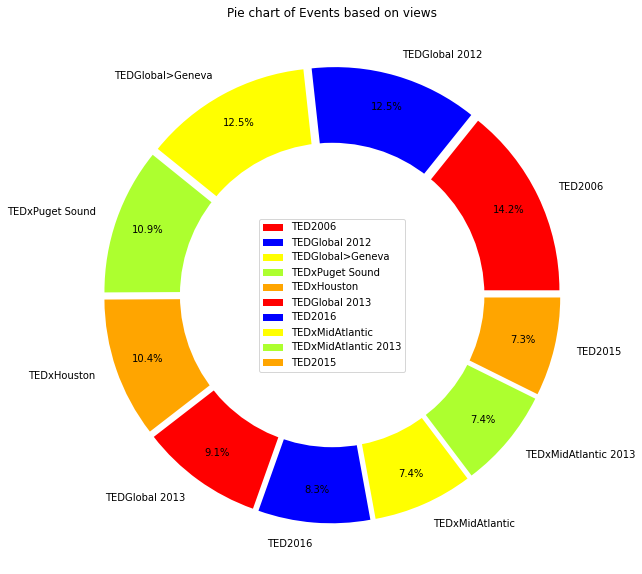

In [39]:
# Chart - 7 visualization code
df_7 = df.nlargest(10,['views'])
# Setting labels for items in Chart
event_list = list(df_7['event'])
# given views
views_list = list(df_7['views'])

colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.figure(figsize=(15,10))
plt.pie(views_list, colors=colors, labels=event_list, autopct='%1.1f%%', pctdistance=0.85, explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
#placing legend at the center can make it even more easy to understand as every inforation will be inside the pie.
plt.title('Pie chart of Events based on views')
plt.legend(event_list, loc="center") 
plt.show()

##### 1. Why did you pick the specific chart?

Donut chart is a kind of pie chart which is of the shape of donut (as we can see in the figure above), It is a really interesting way to showcase the data.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that, out of top ten viewed events **TED2006** is the most viewed event(14.2%). It was also the year when TED launched their first talk, it was a huge sucess for TED. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As stated in above section, TED2006 was a huge sucess for ted but they also set up a bar for themselve, viewer wants to get better and better content to stream so it bacomes TED's responsibility to maintain this viewership.


#### Chart - 8 | Occupation of top 15 speakers

In [40]:
# Chart - 8 visualization code
#applying eval function on occupations column
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis=1)

In [41]:
#defining a new feature called occupation
df['occupation'] = 'other'
#iterating through the each row and extracting occupations of speakers
for index, row in df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    df.loc[index,'occupation'] = str(occup_list)

[Text(0.5, 1.0, 'Occupation of top 15 speakers')]

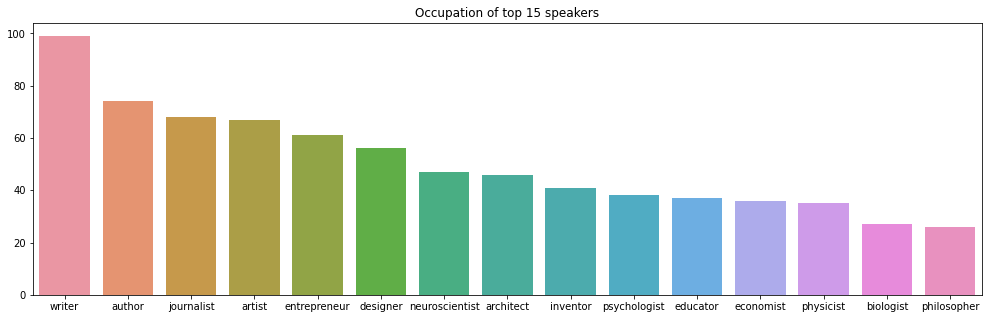

In [42]:
occupation_df=df[df['occupation']!='other']
fig,ax=plt.subplots(figsize=(17,5))
a=sns.barplot(x=occupation_df['occupation'].value_counts(ascending=False).head(15).index, 
              y=occupation_df['occupation'].value_counts(ascending=False).head(15).values, ax=ax)
a.set(title="Occupation of top 15 speakers")


##### 1. Why did you pick the specific chart?

It is the widely used plot when it comeas to campare data, here we are compairing top 15 occupation of most viewed speaker.

##### 2. What is/are the insight(s) found from the chart?

We can see that, writer are the most viewed speakers. the reason is they can write by doing research, that is  they have very broad viewpoint on topics.


Most of the occupation could not clear the 50% views out of 100%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is a negative insight from above chart, i.e. As TED stats to grow, they invited more and more speakers from various occupations. buut with every occupation there comes a viewpoint.


Means, a Physicist will talk about stuff in as physical way as possible.
which will target only a fraction of viewers. 

So, speaker must deliver his/her talk for evey tye  of viewer otherwise the viewer traffic will decrease.


#### Chart - 9 | Published months having maximum daily views

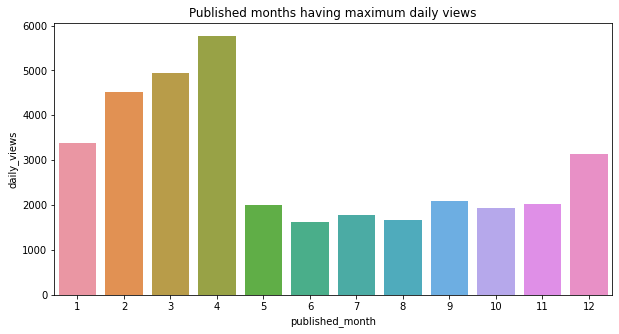

In [43]:
# Chart - 9 visualization code
pop_month=df_new[['published_month','daily_views']].groupby('published_month').agg({'daily_views' : 'mean'})
pop_month=pop_month.sort_values('daily_views',ascending=False)
pop_month.reset_index(inplace=True)

plt.figure(figsize=(10,5))
plt.title('Published months having maximum daily views')
sns.barplot(x='published_month',y='daily_views',data=pop_month)

##### 1. Why did you pick the specific chart?

It is the widely used plot when it comes to campare data, here we are compairing published_months with daily_views.

##### 2. What is/are the insight(s) found from the chart?

we found that -

1. On April, the daily views are maximum.

2. From month May till November the daily views are minimum.

3. Most of the viewer are watching TED Talks from December to April.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, On analyzing the traffic on the most daily viewed months we can conclude various factors with which we can increase the dailly average views.

Also, by investigating the least viewed months, the topics that were covered, speaker occupations related querry we can simply focus on what to deliver next.

#### Chart - 10 | Years having maximum published talks

Text(0.5, 1.0, 'Years having maximum published talks')

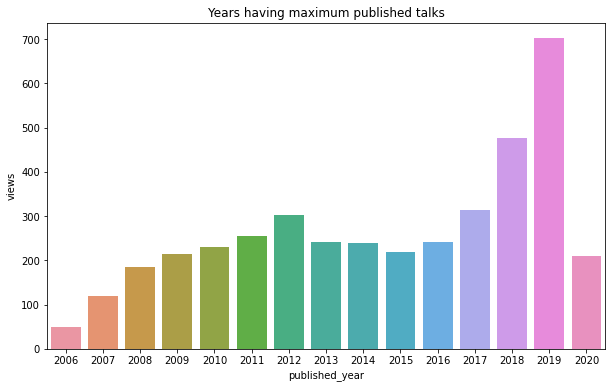

In [44]:
# Chart - 10 visualization code
#Years having maximum published talks 
freq_year=df_new[['published_year','views']].groupby('published_year').agg({'views' : 'count'})
freq_year=freq_year.sort_values('views',ascending=False)
freq_year.reset_index(inplace=True)
#Plotting the years having maximum release 
plt.figure(figsize=(10,6))
sns.barplot(x='published_year',y='views',data=freq_year)
plt.title('Years having maximum published talks')

##### 1. Why did you pick the specific chart?

It is the widely used plot when it comes to campare data, here we are compairing published_year with views count.

##### 2. What is/are the insight(s) found from the chart?

Here, we can see that On 2019, the view count is maximum, that is total views (adding views of every talk), is maximum.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see the chart, the view count is increasing (overall), this showed that TED worked on the content delivered. by doing the same we an maximize the potential of viewers to listen ot ted talks.

#### Chart - 11 | Speaker with longest Talk

In [45]:
# Chart - 11 visualization code
#most recurring events
spea_dur_df=df_new[['speaker_1','duration']].groupby('speaker_1').agg({'duration' : 'count'}).nlargest(10,['duration'])
spea_dur_df.reset_index(inplace=True)

In [46]:
spea_dur_df

,speaker_1,duration
0,Alex Gendler,34
1,Iseult Gillespie,19
2,Emma Bryce,12
3,Daniel Finkel,11
4,Alex Rosenthal,10
5,Hans Rosling,10
6,Greg Gage,9
7,Juan Enriquez,9
8,Chris Anderson,8
9,Dan Ariely,7


['Alex Gendler', 'Iseult Gillespie', 'Emma Bryce', 'Daniel Finkel', 'Alex Rosenthal', 'Hans Rosling', 'Greg Gage', 'Juan Enriquez', 'Chris Anderson', 'Dan Ariely']
[34, 19, 12, 11, 10, 10, 9, 9, 8, 7]


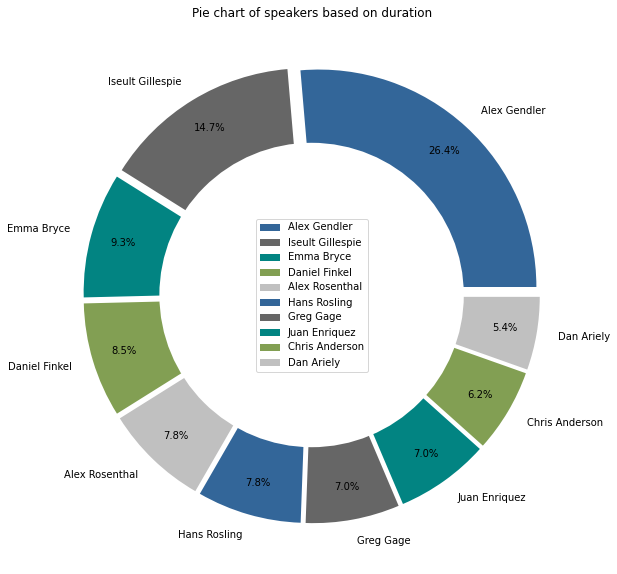

In [47]:
# Setting labels for items in Chart
spea_dur_list = list(spea_dur_df['speaker_1'])
# given views
dur_list = list(spea_dur_df['duration'])
print(spea_dur_list)
print(dur_list)
colors = ['#336699', '#666666', '#028482', '#829F53', '#C0C0C0']

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.figure(figsize=(15,10))
plt.pie(dur_list, colors=colors, labels=spea_dur_list, autopct='%1.1f%%', pctdistance=0.85, explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
#placing legend at the center can make it even more easy to understand as every inforation will be inside the pie.
plt.title('Pie chart of speakers based on duration')
plt.legend(spea_dur_list, loc="center") 
plt.show()

##### 1. Why did you pick the specific chart?

Donut chart is a kind of pie chart which is of the shape of donut (as we can see in the figure above), It is a really interesting way to showcase the data.

##### 2. What is/are the insight(s) found from the chart?

we found that, **Alex Gendler** has the maximum duration of TED talk altogether.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since, Alex Gendler hsa the longest talks that means either his content is targetting many viewers or his fan base is huge.
Either way we must investigate what is he bringing to the talk and try to learn from it.

#### Chart - 12 | Keywords in title

There are 157160 words in the combination of all titles.


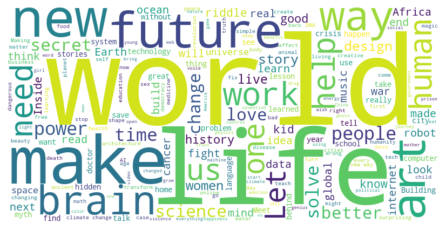

In [48]:
# Chart - 12 visualization code
#making of word cloud from title column
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

I found this chart online while surfing and it really is amazing because of its ability to show the words appeared on the dataset.

##### 2. What is/are the insight(s) found from the chart?

We found that, words with bigger size appeared the most and vice versa.


out of 157160 words in the combination of all titles, words like **World, life, future**, etc are the most used keywords in title of the talk.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, gained insights will help creating a positive business impact because of the fact that title should be viewer friendly.

knowing the fact that which word is used the most can help TED to generate future titles.

#### Chart - 13 | Keywords in topic

There are 404126 words in the combination of all topics.


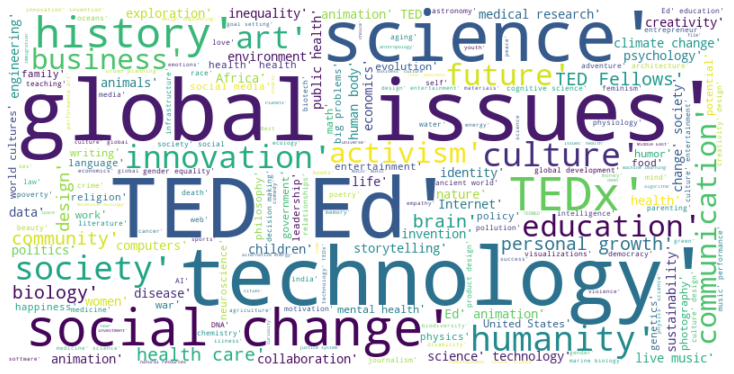

In [49]:
# Chart - 13 visualization code
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="White", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

I found this chart online while surfing and it really is amazing because of its ability to show the words appeared on the dataset.

##### 2. What is/are the insight(s) found from the chart?

We found that, words with bigger size appeared the most and vice versa.

out of 404126 words in the combination of all topics, words like **Technology, Global, science, TED x**, etc are the most used keywords in title of the talk.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, gained insights will help creating a positive business impact because of the fact that topic should be viewer friendly.

knowing the fact that which word is used the most can help TED to generate future topics.

#### Chart - 14 - Correlation Heatmap

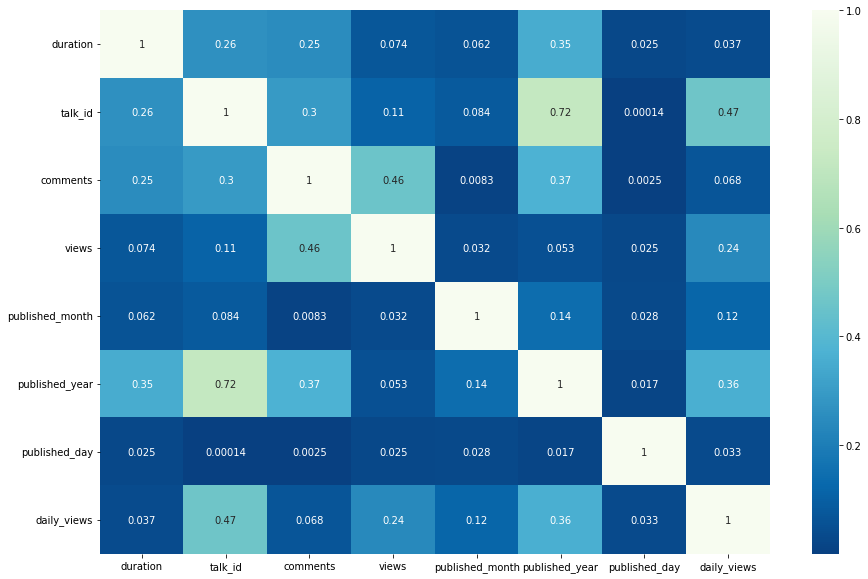

In [50]:
# Correlation Heatmap visualization code
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(np.abs(df_new.corr()), annot= True, cmap= 'GnBu_r',ax=ax)
plt.show()

##### 1. Why did you pick the specific chart?

It is an interesting way to showcase numerical data. A heatmap is a graphical representation of data where individual values are represented as colors.

##### 2. What is/are the insight(s) found from the chart?

The correlation range is [-1,1].

Here in our dataset there is no negative correlation, means there are no such values which varies inversely with the other values.

Published year is highly correlated with talk_id.

Comments generally have low correlation but highly correlated with duration, published year, views and talk_id.



#### Chart - 15 - Pair Plot 

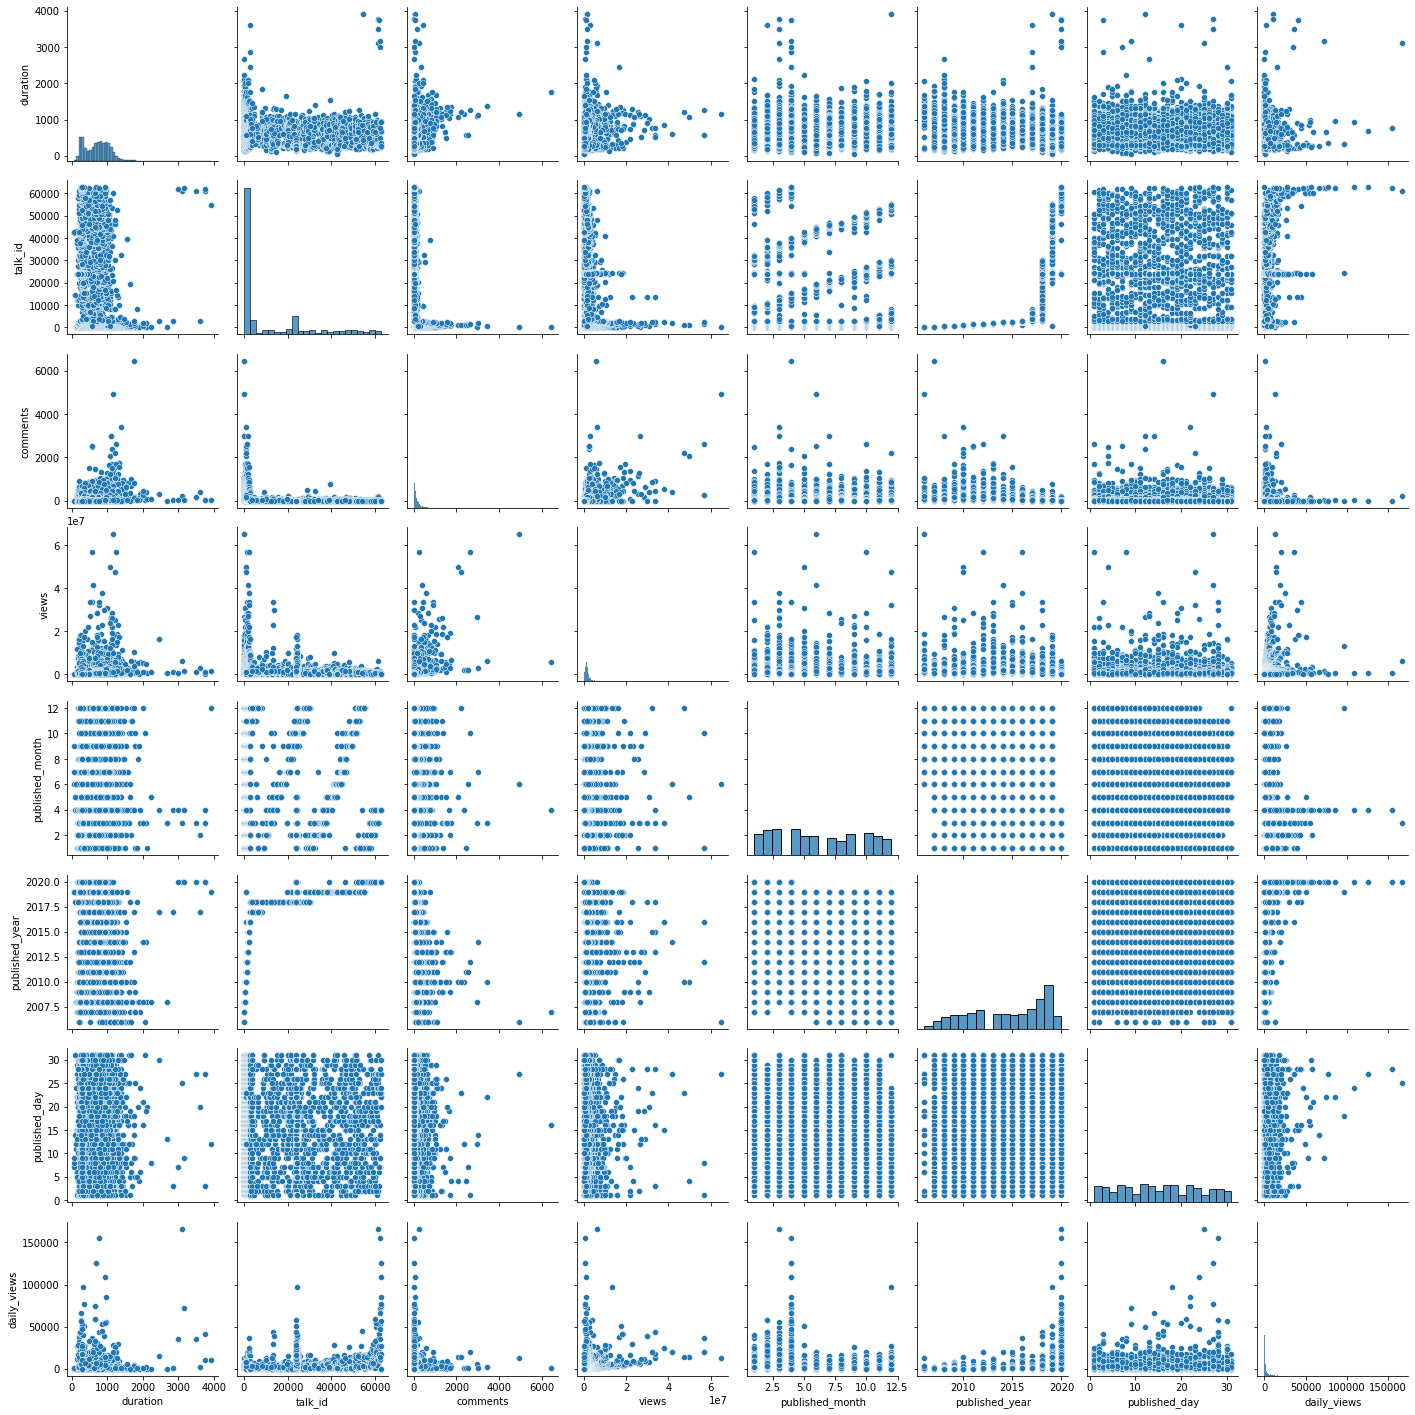

In [51]:
# Pair Plot visualization code
sns.pairplot(df_new)

##### 1. Why did you pick the specific chart?

It is plot that creates a matrix of variables dependency with other variable.
Scatter plot we get from pairplot explains a lot about the whole dataset.

##### 2. What is/are the insight(s) found from the chart?

we found that - 

1. The relatioship between almost every variable is non linear.

2. The outliers must be treated for Machine learning.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Popular speaker of event TED-Ed are those whose views are above average(i.e - 2148005)
2. Trending speakers are the one who is above average daily_views(i.e. 3103)
3. Trending events is the one who is above average daily_views(i.e. 3103)


In [52]:
# Creating Parameter Class 
from scipy.stats import *
import math
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1
Popular speaker of event TED-Ed are those whose views are above average(i.e - 2148005)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 2148005

Alternate Hypothesis : N < 2148005

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [53]:
df['views'].mean()

2148005.5737827714

In [54]:
df_new2 = df[['speaker_1', 'views', 'event']]
df_new2.loc[df['views'] < 2148005.5737827714, 'speaker_1'] = 'False'
df_new2.loc[df['views'] > 2148005.5737827714, 'speaker_1'] = 'True'
df_new2.rename(columns={'speaker_1': 'speakertf'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [55]:
# Perform Statistical Test to obtain P-Value
h1=df_new2[(df_new2['speakertf'] == 'False') & (df_new2['event'] == "TED-Ed")]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 2148005
sample_mean = h1["views"].mean()
size = len(h1)
std=(variance(h1["views"]))**0.5

In [56]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="False",hypothesis_number=hypothesis_number,df=h1,col="views")
# Getting Conclusion
print(conclusion(p))
z

Null Hypothesis rejected Successfully for p = 0.0


-44.74568709031797

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.

##### Why did you choose the specific statistical test?

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


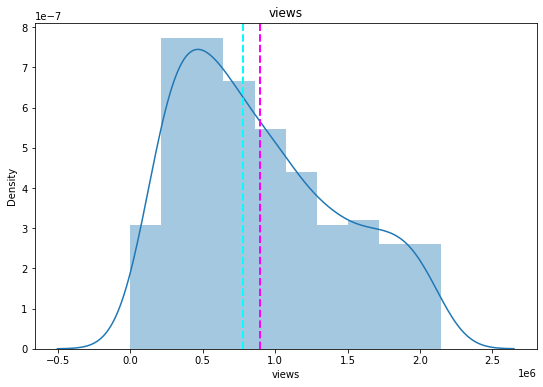

In [57]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (h1["views"])
sns.distplot(h1["views"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('views')
plt.show()

The fact that it can be used to determine the probability of a data point occurring within a certain distribution, that is why I used a-score statistical test.

### Hypothetical Statement - 2
Trending speakers are the one who is above average daily_views(i.e. 3103)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : N = 3103

Alternate Hypothesis : N > 3103

Test Type : Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [58]:
df_new['daily_views'].mean()

3103.6178435437187

In [59]:
df_new3 = df_new[['speaker_1', 'daily_views']]
df_new3.loc[df['daily_views'] < 3103, 'speaker_1'] = 'False'
df_new3.loc[df['daily_views'] > 3103, 'speaker_1'] = 'True'
df_new3.rename(columns={'speaker_1': 'speakertf1'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [60]:
# Perform Statistical Test to obtain P-Value
h2=df_new3[(df_new3["speakertf1"]=='False')]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 3103
sample_mean = h2["daily_views"].mean()
size = len(h2)
std=(variance(h2["daily_views"]))**0.5

In [61]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=h2,col="daily_views")
# Getting Conclusion
print(conclusion(p))
z

Failed to reject the Null Hypothesis for p = 1.0.


-163.6326153128145

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.

##### Why did you choose the specific statistical test?

The fact that it can be used to determine the probability of a data point occurring within a certain distribution, that is why I used a-score statistical test.

### Hypothetical Statement - 3
Trending events is the one who is above average daily_views(i.e. 3103)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : mean = 215

Alternate Hypothesise : mean != 215

Type of Test : Two Tailed test

#### 2. Perform an appropriate statistical test.

In [62]:
df_new4 = df_new[['event', 'daily_views']]
df_new4.loc[df['daily_views'] < 3103, 'event'] = 'False'
df_new4.loc[df['daily_views'] > 3103, 'event'] = 'True'
df_new4.rename(columns={'event': 'eventtf'}, inplace=True)

In [63]:
# Perform Statistical Test to obtain P-Value
h3=df_new3[(df_new4["eventtf"]=='False')]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 3103
sample_mean = h3["daily_views"].mean()
size = len(h3)
std=(variance(h3["daily_views"]))**0.5

In [64]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=h3,col="daily_views")
# Getting Conclusion
print(conclusion(p))
z

Failed to reject the Null Hypothesis for p = 1.0.


-163.6326153128145

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.

##### Why did you choose the specific statistical test?

The fact that it can be used to determine the probability of a data point occurring within a certain distribution, that is why I used a-score statistical test.

## ***6. Feature Engineering & Data Pre-processing***

In [65]:
#Creating a new dataset
data_df = df.copy()

### 1. Handling Missing Values

talk_id                0
title                  0
speaker_1              0
all_speakers           0
occupations            0
about_speakers         0
views                  0
recorded_date          1
published_date         0
event                  0
native_lang            0
available_lang         0
comments               0
duration               0
topics                 0
related_talks          0
url                    0
description            0
transcript             0
time_period_of_talk    0
published_month        0
published_year         0
published_day          0
daily_views            0
occupation             0
dtype: int64


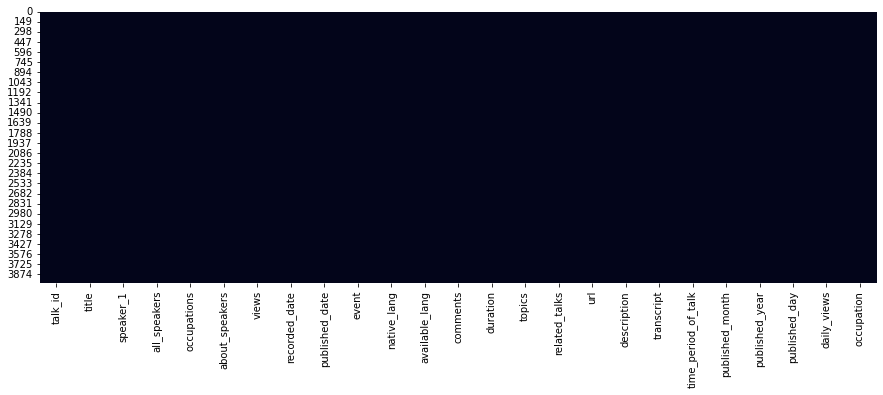

In [66]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

All missing values we taken care of at Data Wrangling section. No further missing value handling is required.

### 2. Handling Outliers

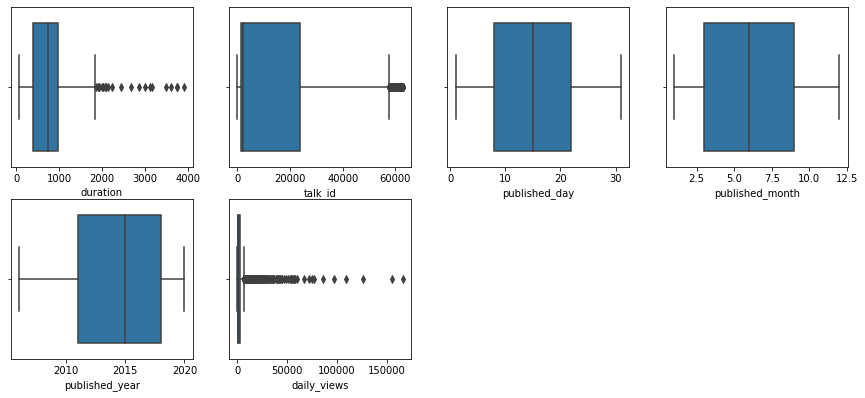

In [67]:
# Handling Outliers & Outlier treatments
#Outliers are only present on few features which needs to be treated.
fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.boxplot(x= data_df['duration'])

plt.subplot(3,4,2)
sns.boxplot(x= data_df['talk_id'])

plt.subplot(3,4,3)
sns.boxplot(x= data_df['published_day'])

plt.subplot(3,4,4)
sns.boxplot(x= data_df['published_month'])

plt.subplot(3,4,5)
sns.boxplot(x= data_df['published_year'])

plt.subplot(3,4,6)
sns.boxplot(x= data_df['daily_views'])


Here we can observe that outliears is only presnet in features like duration, daily_views, talk_id

Out of those features we need to treat only duration feature becasue it will bw needed for tthe ML part.

In [68]:
data_duration_iqr=  data_df['duration'].quantile(0.75)-data_df['duration'].quantile(0.25)
data_df['duration']= data_df['duration'].mask(data_df['duration']>(data_df['duration'].quantile(0.75)+1.5*data_duration_iqr), data_df['duration'].mean())

In [69]:
data_df.shape

(4005, 25)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


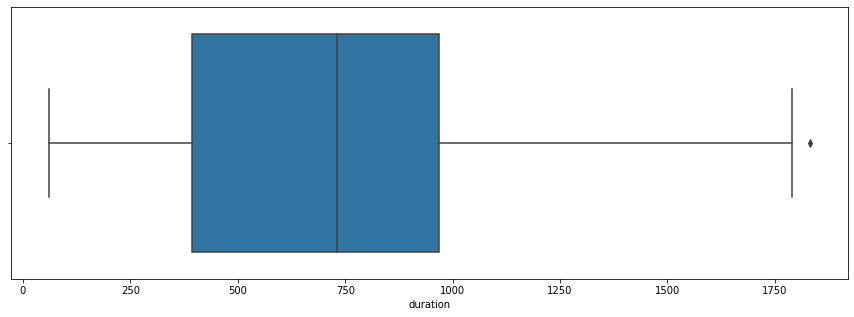

In [70]:
sns.boxplot(data_df['duration'], data= data_df)

Outliers are treated succesfully.

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used **Interquartile range (IQR)** method to remove outlier ffrom the dataset.

I used this method because it is a statistical model and easy to implement yet it shows effective results.

### 3. Categorical Encoding

In [71]:
# Encode your categorical columns
data_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript',
       'time_period_of_talk', 'published_month', 'published_year',
       'published_day', 'daily_views', 'occupation'],
      dtype='object')

In [72]:
unwanted_features=['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'topics',
       'related_talks', 'url', 'description', 'transcript']

In [73]:
data_df2 = data_df.copy()

In [74]:
data_df2.drop(columns=unwanted_features,inplace=True)

In [75]:
data_df2

,comments,duration,time_period_of_talk,published_month,published_year,published_day,daily_views,occupation
0,272.0,977.0,5056 days,6,2006,27,696.735614,climate advocate
1,628.0,1190.0,5056 days,6,2006,27,2867.645837,global health expert; data visionary
2,124.0,1286.0,5056 days,6,2006,27,379.836267,technology columnist
3,219.0,1116.0,5056 days,6,2006,27,526.808187,activist for environmental justice
4,4931.0,1164.0,5056 days,6,2006,27,12863.744117,author
...,...,...,...,...,...,...,...,...
4000,6.0,690.0,3 days,4,2020,27,125733.500000,health activist
4001,0.0,346.0,3 days,4,2020,27,76796.750000,other
4002,9.0,774.0,2 days,4,2020,28,154804.666667,law researcher
4003,0.0,257.0,0 days,4,2020,30,56582.000000,other


In [76]:
#separating the dependent and independent variables
y=data_df2['daily_views']
X=data_df2.drop(['daily_views', 'occupation'], axis = 1)

In [77]:
X.columns

Index(['comments', 'duration', 'time_period_of_talk', 'published_month',
       'published_year', 'published_day'],
      dtype='object')

In [78]:
#one hot encoding on categorical features
X=pd.get_dummies(X)
X.shape

(4005, 6)

In [79]:
X.head(2)

,comments,duration,time_period_of_talk,published_month,published_year,published_day
0,272.0,977.0,5056 days,6,2006,27
1,628.0,1190.0,5056 days,6,2006,27


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used **ONE HOT ENCODING** technique, because it is used to convert categorical variables, which have a limited number of possible values, into a format that can be used by machine learning algorithms. 

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [80]:
#NLP, Sentiment Analysis, Text Clustering can only be done with textual data.
data_df.head().T

,0,1,2,3,4
talk_id,1,92,7,53,66
title,Averting the climate crisis,The best stats you've ever seen,Simplicity sells,Greening the ghetto,Do schools kill creativity?
speaker_1,Al Gore,Hans Rosling,David Pogue,Majora Carter,Sir Ken Robinson
all_speakers,{0: 'Al Gore'},{0: 'Hans Rosling'},{0: 'David Pogue'},{0: 'Majora Carter'},{0: 'Sir Ken Robinson'}
occupations,{0: ['climate advocate']},{0: ['global health expert; data visionary']},{0: ['technology columnist']},{0: ['activist for environmental justice']},"{0: ['author', 'educator']}"
about_speakers,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob...",{0: 'David Pogue is the personal technology co...,{0: 'Majora Carter redefined the field of envi...,"{0: ""Creativity expert Sir Ken Robinson challe..."
views,3523392,14501685,1920832,2664069,65051954
recorded_date,2006-02-25 00:00:00,2006-02-22 00:00:00,2006-02-24 00:00:00,2006-02-26 00:00:00,2006-02-25 00:00:00
published_date,2006-06-27 00:00:00,2006-06-27 00:00:00,2006-06-27 00:00:00,2006-06-27 00:00:00,2006-06-27 00:00:00
event,TED2006,TED2006,TED2006,TED2006,TED2006


In [81]:
data_nlp = data_df.drop(['talk_id', 'daily_views', 'published_day', 'published_year','all_speakers','about_speakers','occupation','occupations', 'published_month', 'time_period_of_talk', 'duration', 'comments', 'event', 'published_date', 'recorded_date', 'views', 'available_lang'], axis = 1)

In [82]:
data_nlp.T

,0,1,2,3,4,5,6,7,8,9,...,3995,3996,3997,3998,3999,4000,4001,4002,4003,4004
title,Averting the climate crisis,The best stats you've ever seen,Simplicity sells,Greening the ghetto,Do schools kill creativity?,Behind the design of Seattle's library,Letting go of God,Let's teach religion -- all religion -- in sch...,A life of purpose,My wish: A global day of film,...,An ode to living on Earth,The wildly complex anatomy of a sneaker,The benefits of expressing your emotions (cons...,What happens if you cut down all of a city's t...,A global pandemic calls for global solutions,"Crisis support for the world, one text away",The dark history of IQ tests,"How ""policing for profit"" undermines your rights",The electrifying speeches of Sojourner Truth,The most important anus in the ocean
speaker_1,Al Gore,Hans Rosling,David Pogue,Majora Carter,Sir Ken Robinson,Joshua Prince-Ramus,Julia Sweeney,Dan Dennett,Rick Warren,Jehane Noujaim,...,Oliver Jeffers,Angel Chang,Artūrs Miksons,Stefan Al,Larry Brilliant,Nancy Lublin,Stefan C Dombrowski,Dick M. Carpenter II,Daina Ramey Berry,Cella Wright
native_lang,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,en,en,en,en,en
topics,"['alternative energy', 'cars', 'climate change...","['Africa', 'Asia', 'Google', 'demo', 'economic...","['computers', 'entertainment', 'interface desi...","['MacArthur grant', 'activism', 'business', 'c...","['children', 'creativity', 'culture', 'dance',...","['architecture', 'collaboration', 'culture', '...","['Christianity', 'God', 'atheism', 'comedy', '...","['God', 'atheism', 'brain', 'cognitive science...","['Christianity', 'God', 'culture', 'happiness'...","['TED Prize', 'culture', 'entertainment', 'fil...",...,"['Planets', 'art', 'poetry', 'life', 'love', '...","['TED-Ed', 'education', 'animation', 'fashion'...","['life', 'emotions', 'communication', 'stigma'...","['animation', 'TED-Ed', 'cities', 'education',...","['coronavirus', 'pandemic', 'epidemiology', 'v...","['activism', 'data', 'technology', 'mental hea...","['TED-Ed', 'education', 'history', 'animation'...","['society', 'law', 'policy', 'justice system',...","['TED-Ed', 'education', 'animation', 'United S...","['animals', 'TED-Ed', 'animation', 'oceans', '..."
related_talks,"{243: 'New thinking on the climate crisis', 54...","{2056: ""Own your body's data"", 2296: 'A visual...","{1725: '10 top time-saving tech tips', 2274: '...",{1041: '3 stories of local eco-entrepreneurshi...,"{865: 'Bring on the learning revolution!', 173...",{750: 'Building a theater that remakes itself'...,"{22: 'Why people believe weird things', 94: ""L...","{71: 'A life of purpose', 2011: 'Is religion g...","{94: ""Let's teach religion -- all religion -- ...",{2228: 'How virtual reality can create the ult...,...,{44696: 'You are not alone in your loneliness'...,{2756: 'What really happens to the plastic you...,"{7592: 'The history of human emotions', 9463: ...","{61316: ""Why isn't the Netherlands underwater?...","{58: 'My wish: Help me stop pandemics', 61303:...",{2362: 'How data from a crisis text line is sa...,{35386: 'How does the Rorschach inkblot test w...,"{2406: 'I love being a police officer, but we ...",{20973: 'The breathtaking courage of Harriet T...,"{62347: 'The bug that poops candy', 29159: 'In..."
url,https://www.ted.com/talks/al_gore_averting_the...,https://www.ted.com/talks/hans_rosling_the_bes...,https://www.ted.com/talks/david_pogue_simplici...,https://www.ted.com/talks/majora_carter_greeni...,https://www.ted.com/talks/sir_ken_robinson_do_...,https://www.ted.com/talks/joshua_prince_ramus_...,https://www.ted.com/talks/julia_sweeney_lettin...,https://www.ted.com/talks/dan_dennett_let_s_te...,https://www.ted.com/talks/rick_warren_a_life_o...,https://www.ted.com/talks/jehane_noujaim_my_wi...,...,https://www.ted.com/talks/oliver_jeffers_an_od...,https://www.ted.com/talks/angel_chang_the_wild...,https://www.ted.com/talks/arturs_miksons_the_b...,https://www.ted.com/talks/stefan_al_what_happe...,https://www.ted.com/talks/la

#### 1. Expand Contraction

In [83]:
# Expand Contraction on feature title
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 18.2 MB/s eta 0:00:00


In [84]:
import contractions
text = list(data_nlp['description'])
text

['With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.',
 'You\'ve never seen data presented like this. With the drama and urgency of a sportscaster, statistics guru Hans Rosling debunks myths about the so-called "developing world."',
 'New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song.',
 'In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for environmental justice in the South Bronx -- and shows how minority neighborhoods suffer most from flawed urban policy.',
 'Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.',
 'Arc

In [85]:
expanded_text = []
for i in text:
  expanded_text.append(contractions.fix(i))
expanded_text

['With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.',
 'You have never seen data presented like this. With the drama and urgency of a sportscaster, statistics guru Hans Rosling debunks myths about the so-called "developing world."',
 'New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song.',
 'In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for environmental justice in the South Bronx -- and shows how minority neighborhoods suffer most from flawed urban policy.',
 'Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.',
 'Ar

Expand Contraction done using **Contraction** library.

#### 2. Lower Casing

In [86]:
# Lower Casing

text = [item.lower() for item in text]
text

['with the same humor and humanity he exuded in "an inconvenient truth," al gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.',
 'you\'ve never seen data presented like this. with the drama and urgency of a sportscaster, statistics guru hans rosling debunks myths about the so-called "developing world."',
 'new york times columnist david pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products that get it right. to funny things up, he bursts into song.',
 'in an emotionally charged talk, macarthur-winning activist majora carter details her fight for environmental justice in the south bronx -- and shows how minority neighborhoods suffer most from flawed urban policy.',
 'sir ken robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.',
 'arc

Lower Casing done using lower method

#### 3. Removing Punctuations

In [87]:
# Remove Punctuations
import string
no_punct_list = [''.join(c for c in s if c not in string.punctuation) for s in text]
no_punct_list

['with the same humor and humanity he exuded in an inconvenient truth al gore spells out 15 ways that individuals can address climate change immediately from buying a hybrid to inventing a new hotter brand name for global warming',
 'youve never seen data presented like this with the drama and urgency of a sportscaster statistics guru hans rosling debunks myths about the socalled developing world',
 'new york times columnist david pogue takes aim at technology’s worst interfacedesign offenders and provides encouraging examples of products that get it right to funny things up he bursts into song',
 'in an emotionally charged talk macarthurwinning activist majora carter details her fight for environmental justice in the south bronx  and shows how minority neighborhoods suffer most from flawed urban policy',
 'sir ken robinson makes an entertaining and profoundly moving case for creating an education system that nurtures rather than undermines creativity',
 'architect joshua princeramus t

Punctuations removed

#### 4. Removing URLs & Removing words and digits contain digits.

In [88]:
# Remove URLs & Remove words and digits contain digits
# Define a lambda function to remove URLs
import re
remove_urls = lambda x: re.sub(r'https?:\/\/[^\s]+', '', x)

# Apply the lambda function to the 'url' column
data_nlp['url'] = data_nlp['url'].apply(remove_urls)

print(data_nlp['url'])

0        
1        
2        
3        
4        
       ..
4000     
4001     
4002     
4003     
4004     
Name: url, Length: 4005, dtype: object


#### 5. Removing Stopwords & Removing White spaces

In [89]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords


In [90]:
# Download NLTK's stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [91]:
# Define a lambda function to remove stopwords
remove_stopwords = lambda x: " ".join([word for word in x.split() if word.lower() not in stop_words])

data_nlp['description'] = data_nlp['description'].apply(remove_stopwords)

In [92]:
data_nlp['description']

0       humor humanity exuded "An Inconvenient Truth,"...
1       never seen data presented like this. drama urg...
2       New York Times columnist David Pogue takes aim...
3       emotionally charged talk, MacArthur-winning ac...
4       Sir Ken Robinson makes entertaining profoundly...
                              ...                        
4000    could help people crisis anytime, anywhere sim...
4001    1905, psychologists Alfred Binet Théodore Simo...
4002    Many countries active, centuries-old law allow...
4003    Isabella Baumfree born slavery late 18th centu...
4004    fuzzy sock? overripe banana? moldy tube toothp...
Name: description, Length: 4005, dtype: object

Stopwords removed

In [93]:
# Remove White spaces

# Define a lambda function to remove whitespace
remove_whitespace = lambda x: x.replace(" ", "")

# Apply the lambda function to the 'description' column
data_nlp['description'] = data_nlp['description'].apply(remove_whitespace)

print(data_nlp['description'])

0       humorhumanityexuded"AnInconvenientTruth,"AlGor...
1       neverseendatapresentedlikethis.dramaurgencyspo...
2       NewYorkTimescolumnistDavidPoguetakesaimtechnol...
3       emotionallychargedtalk,MacArthur-winningactivi...
4       SirKenRobinsonmakesentertainingprofoundlymovin...
                              ...                        
4000    couldhelppeoplecrisisanytime,anywheresimpletex...
4001    1905,psychologistsAlfredBinetThéodoreSimondesi...
4002    Manycountriesactive,centuries-oldlawallowsgove...
4003    IsabellaBaumfreebornslaverylate18thcenturyNewY...
4004    fuzzysock?overripebanana?moldytubetoothpaste?f...
Name: description, Length: 4005, dtype: object


White spaces removed.

#### 6. Rephrase Text

In [94]:
# Rephrase Text
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [95]:
from textblob import TextBlob

In [96]:
# Define a lambda function to rephrase text
rephrase = lambda x: TextBlob(x).words.pluralize()

# Apply the lambda function to the 'description' column
data_nlp['description'] = data_nlp['description'].apply(rephrase)

data_nlp['description']


0       [humorhumanityexudeds, AnInconvenientTruths, A...
1       [neverseendatapresentedlikethis.dramaurgencysp...
2       [NewYorkTimescolumnistDavidPoguetakesaimtechno...
3       [emotionallychargedtalks, MacArthur-winningact...
4       [SirKenRobinsonmakesentertainingprofoundlymovi...
                              ...                        
4000    [couldhelppeoplecrisisanytimes, anywheresimple...
4001    [1905s, psychologistsAlfredBinetThéodoreSimond...
4002    [Manycountriesactives, centuries-oldlawallowsg...
4003    [IsabellaBaumfreebornslaverylate18thcenturyNew...
4004    [fuzzysocks, overripebananas, moldytubetoothpa...
Name: description, Length: 4005, dtype: object

Description feature was rephrased but it may be of no use.

#### 7. Tokenization

In [97]:
# Tokenization
# Define a lambda function to tokenize text
tokenize = lambda x: nltk.word_tokenize(x)

# Apply the lambda function to the 'title' column
data_nlp['title'] = data_nlp['title'].apply(tokenize)

data_nlp['title']

0                        [Averting, the, climate, crisis]
1                [The, best, stats, you, 've, ever, seen]
2                                     [Simplicity, sells]
3                                 [Greening, the, ghetto]
4                      [Do, schools, kill, creativity, ?]
                              ...                        
4000    [Crisis, support, for, the, world, ,, one, tex...
4001                  [The, dark, history, of, IQ, tests]
4002    [How, ``, policing, for, profit, '', undermine...
4003    [The, electrifying, speeches, of, Sojourner, T...
4004         [The, most, important, anus, in, the, ocean]
Name: title, Length: 4005, dtype: object

Tokenization is done.

#### 8. Text Normalization

In [101]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# using Lemmatization
# Download NLTK's WordNet Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [102]:

# Define a lambda function to lemmatize text
lemmatizer = nltk.stem.WordNetLemmatizer()
lemmatize_words = lambda x: [lemmatizer.lemmatize(word) for word in x.split()]

# Apply the lambda function to the 'topics' column
data_nlp['topics'] = df['topics'].apply(lemmatize_words)

data_nlp['topics']

0       [['alternative, energy',, 'cars',, 'climate, c...
1       [['Africa',, 'Asia',, 'Google',, 'demo',, 'eco...
2       [['computers',, 'entertainment',, 'interface, ...
3       [['MacArthur, grant',, 'activism',, 'business'...
4       [['children',, 'creativity',, 'culture',, 'dan...
                              ...                        
4000    [['activism',, 'data',, 'technology',, 'mental...
4001    [['TED-Ed',, 'education',, 'history',, 'animat...
4002    [['society',, 'law',, 'policy',, 'justice, sys...
4003    [['TED-Ed',, 'education',, 'animation',, 'Unit...
4004    [['animals',, 'TED-Ed',, 'animation',, 'oceans...
Name: topics, Length: 4005, dtype: object

##### Which text normalization technique have you used and why?

using Lemmatization because it returns actual words rather than their roots liek in stemming.

#### 9. Part of speech tagging

In [103]:
# POS Taging
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [104]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [105]:
data_nlp['topics'] = df['topics'].apply(lemmatize_words)
df['pos_tags'] = data_nlp['topics'].apply(nltk.pos_tag)
df['pos_tags']

0       [(['alternative, JJ), (energy',, NN), ('cars',...
1       [(['Africa',, JJ), ('Asia',, POS), ('Google',,...
2       [(['computers',, JJ), ('entertainment',, POS),...
3       [(['MacArthur, NN), (grant',, NN), ('activism'...
4       [(['children',, JJ), ('creativity',, POS), ('c...
                              ...                        
4000    [(['activism',, JJ), ('data',, POS), ('technol...
4001    [(['TED-Ed',, JJ), ('education',, ''), ('histo...
4002    [(['society',, JJ), ('law',, POS), ('policy',,...
4003    [(['TED-Ed',, JJ), ('education',, ''), ('anima...
4004    [(['animals',, JJ), ('TED-Ed',, CD), ('animati...
Name: pos_tags, Length: 4005, dtype: object

Tagging of part of speech is done.

#### 10. Text Vectorization

In [106]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit the vectorizer on the text column
tfidf.fit(df['transcript'])

# Transform the text column
tfidf_matrix = tfidf.transform(df['transcript'])

# You can check the feature names and sparse matrix
print(tfidf.get_feature_names())
print(tfidf_matrix.toarray())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00', '000', '0000', '000000004', '0000001', '000001', '00001', '000042', '0001', '00046', '0009', '000th', '001', '0015', '002', '0025', '003', '004', '004867', '005', '005545', '005634', '005961', '006', '007', '007080', '008106', '008309', '008494', '01', '01010100', '0111', '02', '020', '024', '025', '03', '034', '035', '04', '040', '0400', '041', '047', '048', '05', '050', '05049', '051', '052', '06', '064', '07', '077', '08', '080', '08pm', '09', '092', '098', '0b2472', '0s', '10', '100', '1000', '1000awesomethings', '1000th', '1000x', '1001', '100k', '100lbs', '100th', '100ths', '100x', '101', '10165', '102', '1024', '103', '103rd', '104', '104th', '105', '1054', '106', '1066', '107', '107th', '108', '1083', '109', '1095', '109th', '10am', '10b', '10pm', '10s', '10th', '10x', '10x10', '10x8', '11', '110', '1100', '111', '112', '1127', '1128', '113', '1130', '1137', '114', '114th', '115', '1155', '1159', '116', '1165', '117', '1173', '117th', '118', '1180', '119', '11pm', '11s',

##### Which text vectorization technique have you used and why?

TF-IDF stands for Term Frequency-Inverse Document Frequency.

I used this technique particularly for description feature because of the basic idea that the word that appears more will have more importance with respect to the data.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   talk_id              4005 non-null   int64          
 1   title                4005 non-null   object         
 2   speaker_1            4005 non-null   object         
 3   all_speakers         4005 non-null   object         
 4   occupations          4005 non-null   object         
 5   about_speakers       4005 non-null   object         
 6   views                4005 non-null   int64          
 7   recorded_date        4004 non-null   datetime64[ns] 
 8   published_date       4005 non-null   datetime64[ns] 
 9   event                4005 non-null   object         
 10  native_lang          4005 non-null   object         
 11  available_lang       4005 non-null   object         
 12  comments             4005 non-null   float64        
 13  duration          

In [117]:
# Manipulate Features to minimize feature correlation and create new features
# extracting a feature from published months and days in such a way that the values get minimized.
published_month_qtr = []



#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***